In [ ]:
import pandas as pd


In [ ]:
series = pd.Series([1, 2, 3, 4, 5])
print(series)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [ ]:
series = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
print(series)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [ ]:
series.shape,series.ndim,series.size

((5,), 1, 5)

In [ ]:
df=pd.DataFrame({'A':[1,2,3,4,5],'B':[6,7,8,9,10]},['a','b','c','d','e'])
print(df)

   A   B
a  1   6
b  2   7
c  3   8
d  4   9
e  5  10


In [ ]:
df.shape,df.ndim,df.size

((5, 2), 2, 10)

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/data/data.csv")
df.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
df.tail()

,x,y
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [ ]:
df.shape,df.size

((100, 2), 200)

In [ ]:
df.columns

Index(['x', 'y'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.describe()

,x,y
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [ ]:
df.isnull().sum()
#if 0 ko satta aru kai number aaye tyo value missing xa natra xaina

,0
x,0
y,0


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris ()
# Load the Iris dataset
iris_df = pd.DataFrame(
     data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target']
)
np . random . seed (42) # Introduce missing values randomly
mask = np . random . rand (* iris_df . shape ) < 0.1 # 10%
iris_df [ mask ] = np . nan
print (" Missing Values in Iris Dataset :")
print ( iris_df . isnull () .sum () )

 Missing Values in Iris Dataset :
sepal length (cm)    15
sepal width (cm)     15
petal length (cm)    19
petal width (cm)     15
target               19
dtype: int64


In [ ]:
# Filling missing values with forward fill ( ffill ), mean
# median , and 0
iris_df_ffill = iris_df . ffill ()
iris_df_mean = iris_df . fillna ( iris_df . mean () )
iris_df_median = iris_df . fillna ( iris_df . median () )
iris_df_zero = iris_df . fillna (0)
# Expand iris_df with filled columns
iris_df_expanded = pd.concat([iris_df, iris_df_ffill.add_suffix('_ffill'), iris_df_mean.add_suffix('_mean'), iris_df_median.add_suffix('_median'), iris_df_zero.add_suffix('_zero')], axis=1)
# Display the head of the expanded DataFrame
print ("\ nDataset after Filling Missing Values :")
print ( iris_df_expanded . head () )

\ nDataset after Filling Missing Values :
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               NaN                1.4               0.2   
2                NaN               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  sepal length (cm)_ffill  sepal width (cm)_ffill  \
0     0.0                      5.1                     3.5   
1     0.0                      4.9                     3.5   
2     0.0                      4.9                     3.2   
3     0.0                      4.6                     3.1   
4     0.0                      5.0                     3.6   

   petal length (cm)_ffill  petal width (cm)_ffill  target_ffill  ...  \
0                      1.4           

In [ ]:
iris_df.isnull().sum()

,0
sepal length (cm),15
sepal width (cm),15
petal length (cm),19
petal width (cm),15
target,19


In [ ]:
import pandas as pd

# Sample DataFrame
data = {'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02'],
        'City': ['Kathmandu', 'Pokhara', 'Kathmandu', 'Pokhara'],
        'Temperature': [15, 18, 16, 19]}
df = pd.DataFrame(data)

# Pivot: Reshape data to show cities as columns
pivoted_df = df.pivot(index='Date', columns='City', values='Temperature')
print(pivoted_df)

City        Kathmandu  Pokhara
Date                          
2024-01-01         15       18
2024-01-02         16       19


In [ ]:
# Melt: Convert wide data back to long format
melted_df = pd.melt(pivoted_df.reset_index(), id_vars=['Date'],
                    var_name='City', value_name='Temperature')
print(melted_df)

         Date       City  Temperature
0  2024-01-01  Kathmandu           15
1  2024-01-02  Kathmandu           16
2  2024-01-01    Pokhara           18
3  2024-01-02    Pokhara           19


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()  # Load the Iris dataset
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Min-Max Scaling using Pandas
iris_minmax_scaled = (iris_df - iris_df.min()) / (iris_df.max() - iris_df.min())

print("Original Iris DataFrame:")
print(iris_df.head())
print("\nMin-Max Scaled Iris DataFrame:")
print(iris_minmax_scaled.head())

Original Iris DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Min-Max Scaled Iris DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


In [ ]:
import pandas as pd

# Sample DataFrame with ordinal categories
df = pd.DataFrame({'Category': ['Low', 'Medium', 'High', 'Low', 'High']})

# Ordinal encoding using map
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Category_Ordinal'] = df['Category'].map(ordinal_mapping)

print(df)

  Category  Category_Ordinal
0      Low                 1
1   Medium                 2
2     High                 3
3      Low                 1
4     High                 3


In [ ]:
import pandas as pd

df_municipalities = pd.DataFrame({'Municipality': ['Kathmandu', 'Bhaktapur', 'Lalitpur', 'Madhyapur Thimi', 'Kirtipur']})

one_hot_encoding = pd.get_dummies(df_municipalities['Municipality'], prefix='Municipality')

df_encoded = pd.concat([df_municipalities, one_hot_encoding], axis=1)

print(df_encoded)  # Display the result

      Municipality  Municipality_Bhaktapur  Municipality_Kathmandu  \
0        Kathmandu                   False                    True   
1        Bhaktapur                    True                   False   
2         Lalitpur                   False                   False   
3  Madhyapur Thimi                   False                   False   
4         Kirtipur                   False                   False   

   Municipality_Kirtipur  Municipality_Lalitpur  Municipality_Madhyapur Thimi  
0                  False                  False                         False  
1                  False                  False                         False  
2                  False                   True                         False  
3                  False                  False                          True  
4                   True                  False                         False  


In [ ]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Row-wise concatenation
combined_rows = pd.concat([df1, df2], axis=0)
print("Row-wise concatenation:")
print(combined_rows)

# Column-wise concatenation
combined_cols = pd.concat([df1, df2], axis=1)
print("\nColumn-wise concatenation:")
print(combined_cols)

Row-wise concatenation:
   A  B
0  1  3
1  2  4
0  5  7
1  6  8

Column-wise concatenation:
   A  B  A  B
0  1  3  5  7
1  2  4  6  8


In [ ]:
#problem 1
#Dataset bank.csv
#1.
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data/bank .csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#2.
# Check the info of the DataFrame
df_info = df.info()
print(df_info)

object_columns = df.select_dtypes(include=['object']).columns
print("\nColumns with dtype=object:")
print(object_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan'

In [ ]:
#2(b)

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/bank .csv')

# Get info of the DataFrame
df.info()

# Identify columns with dtype 'object'
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Unique values in 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired

In [ ]:
#2(c)
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/bank .csv')

# Check for the total number of null values in each column
null_values = df.isnull().sum()

# Print the result
print(null_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
#3
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/bank .csv')

# Drop columns with dtype 'object' and store in a new DataFrame
df_numeric = df.select_dtypes(exclude=['object'])

# Save the new DataFrame to a CSV file
df_numeric.to_csv('banknumericdata.csv', index=False)

# Optional: print the first few rows of the new DataFrame to verify
print(df_numeric.head())

   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0


In [ ]:
#4
import pandas as pd

# Read the 'banknumericdata.csv' file
df_numeric = pd.read_csv('banknumericdata.csv')

# Get the summary statistics for the numeric columns
summary_statistics = df_numeric.describe()

# Print the summary statistics
print(summary_statistics)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [ ]:
#Problem 2 Data imputations
#1.
import pandas as pd

# Load the 'medical student' dataset
df = pd.read_csv('/content/drive/MyDrive/data/medical_students_dataset.csv')

# Print the first few rows to verify
print(df.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


In [ ]:
#2
import pandas as pd

# Load the 'medical student' dataset
df = pd.read_csv('/content/drive/MyDrive/data/medical_students_dataset.csv')

# Check the info of the DataFrame
df.info()

# Identify columns with missing (null) values
missing_values = df.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            200

In [ ]:
#3
import pandas as pd

# Load the 'medical student' dataset
df = pd.read_csv('/content/drive/MyDrive/data/medical_students_dataset.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

if 'age' in df.columns:
    # If 'age' is skewed, use median to fill missing values
    df['age'] = df['age'].fillna(df['age'].median())
    print("Missing values in 'age' filled using median.")


if 'gender' in df.columns:
    # Fill missing values in 'gender' with the most frequent value (mode)
    df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
    print("Missing values in 'gender' filled using mode.")


if 'timestamp' in df.columns:
    df['timestamp'] = df['timestamp'].fillna(method='ffill')
    print("Missing values in 'timestamp' filled using forward fill.")

# Check if all missing values have been filled
print("\nMissing values after imputation:\n", df.isnull().sum())

Columns with missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

Missing values after imputation:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


In [ ]:
#4
import pandas as pd

# Load the 'medical student' dataset
df = pd.read_csv('/content/drive/MyDrive/data/medical_students_dataset.csv')

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

# If there are duplicates, remove them
if duplicate_rows > 0:
    # Remove duplicate rows
    df_cleaned = df.drop_duplicates()

    # Print the number of rows after removing duplicates
    print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")
else:
    print("No duplicates found.")

# Optionally: Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('medical_student_cleaned.csv', index=False)

# Check the first few rows of the cleaned DataFrame
print("\nFirst few rows after cleaning:")
print(df_cleaned.head())

Number of duplicate rows: 7644
Number of rows after removing duplicates: 192356

First few rows after cleaning:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0 

In [ ]:
#Exercise 3.2
#Dataset name 'titanic.csv'
#Problem 1
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

# Subset the DataFrame to include only relevant columns
df_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retain only rows where Pclass is equal to 1 (first-class passengers)
df_first_class = df_subset[df_subset['Pclass'] == 1]

# Calculate the mean, median, maximum, and minimum of the 'Fare' column
mean_fare = df_first_class['Fare'].mean()
median_fare = df_first_class['Fare'].median()
max_fare = df_first_class['Fare'].max()
min_fare = df_first_class['Fare'].min()

# Print the results
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


In [ ]:
#Problem 2
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

# Subset the DataFrame to include only relevant columns
df_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]


df_first_class = df_subset[df_subset['Pclass'] == 1]

# Check the number of null values in the 'Age' column
null_age_count = df_first_class['Age'].isnull().sum()

# Print the number of null values
print(f"Number of null values in 'Age' column: {null_age_count}")

# Drop rows with missing values in the 'Age' column
df_first_class_cleaned = df_first_class.dropna(subset=['Age'])

# Verify the changes
print(f"Number of rows after dropping null values: {df_first_class_cleaned.shape[0]}")

Number of null values in 'Age' column: 30
Number of rows after dropping null values: 186


In [ ]:
#Problem 3
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

# Check the unique values in the 'Embarked' column
print("Unique values in 'Embarked' column:")
print(df['Embarked'].unique())

# Check for missing values in 'Embarked'
missing_embarked = df['Embarked'].isnull().sum()
print(f"\nNumber of missing values in 'Embarked' column: {missing_embarked}")

# Handle missing values - We can either drop or fill with the mode (most frequent value)
# Let's fill missing 'Embarked' values with the mode (most frequent port)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check the frequency of each embarkation port after filling missing values
embarked_freq = df['Embarked'].value_counts()
print("\nFrequency of each embarkation port:")
print(embarked_freq)


# Display the first few rows of the DataFrame after handling the 'Embarked' column
print("\nFirst few rows after handling 'Embarked' column:")
print(df[['Name', 'Pclass', 'Embarked']].head())

Unique values in 'Embarked' column:
['S' 'C' 'Q' nan]

Number of missing values in 'Embarked' column: 2

Frequency of each embarkation port:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

First few rows after handling 'Embarked' column:
                                                Name  Pclass Embarked
0                            Braund, Mr. Owen Harris       3        S
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1        C
2                             Heikkinen, Miss. Laina       3        S
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1        S
4                           Allen, Mr. William Henry       3        S


In [ ]:
#1.

import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

# Use one-hot encoding to convert 'Embarked' into separate binary columns
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Print the first few rows of the new one-hot encoded columns
print(df_encoded.head())

   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


In [ ]:
#2.

import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

# Check the unique values in the 'Embarked' column to see if it matches 'C', 'Q', 'S'
print(df['Embarked'].unique())

# Use one-hot encoding to convert 'Embarked' into separate binary columns
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Print the column names of the encoded DataFrame to ensure the columns were created
print(df_encoded.columns)

# Add the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Print the first few rows of the modified DataFrame to verify the changes
print(df[['Name', 'Pclass'] + list(df_encoded.columns)].head())

['S' 'C' 'Q' nan]
Index(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')
                                                Name  Pclass  Embarked_C  \
0                            Braund, Mr. Owen Harris       3       False   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1        True   
2                             Heikkinen, Miss. Laina       3       False   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1       False   
4                           Allen, Mr. William Henry       3       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [ ]:
#3.
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

# Check the unique values in the 'Embarked' column to see if it matches 'C', 'Q', 'S'
print(df['Embarked'].unique())

# Use one-hot encoding to convert 'Embarked' into separate binary columns
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'Embarked' column
df = df.drop(columns=['Embarked'])

# Print the first few rows of the modified DataFrame to verify the changes
print(df[['Name', 'Pclass'] + list(df_encoded.columns)].head())

['S' 'C' 'Q' nan]
                                                Name  Pclass  Embarked_C  \
0                            Braund, Mr. Owen Harris       3       False   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1        True   
2                             Heikkinen, Miss. Laina       3       False   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1       False   
4                           Allen, Mr. William Henry       3       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [ ]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

# Check the unique values in the 'Embarked' column to see if it matches 'C', 'Q', 'S'
print("Unique values in 'Embarked' column:", df['Embarked'].unique())

# Use one-hot encoding to convert 'Embarked' into separate binary columns
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Print the columns of the one-hot encoded DataFrame to check what was created
print("Columns created by one-hot encoding:", df_encoded.columns)

# Add the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'Embarked' column
df = df.drop(columns=['Embarked'])

# Print the first few rows of the modified DataFrame to verify the changes
print(df[['Name', 'Pclass'] + list(df_encoded.columns)].head())

Unique values in 'Embarked' column: ['S' 'C' 'Q' nan]
Columns created by one-hot encoding: Index(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')
                                                Name  Pclass  Embarked_C  \
0                            Braund, Mr. Owen Harris       3       False   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1        True   
2                             Heikkinen, Miss. Laina       3       False   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1       False   
4                           Allen, Mr. William Henry       3       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-23-7078241a53e8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values, palette='viridis')


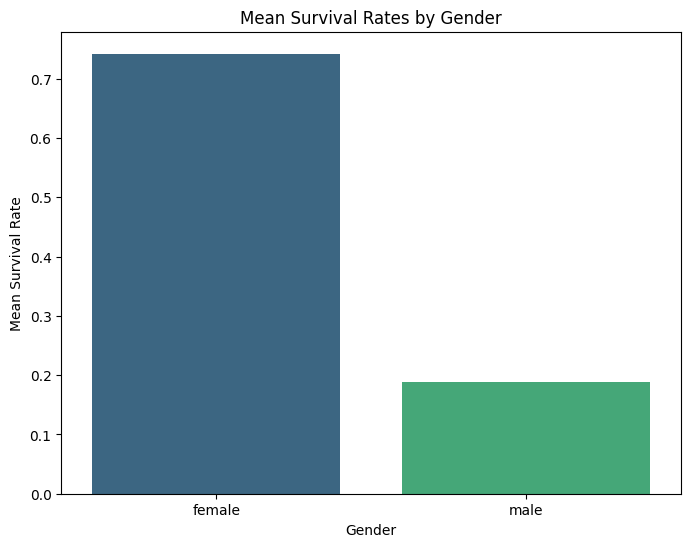

In [ ]:
#Problem 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

# Group by 'Sex' and calculate the mean of 'Survived' for each group
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()

# Print the mean survival rates by gender
print(mean_survival_by_gender)

# Create a bar plot to visualize the survival rates by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values, palette='viridis')

# Set the title and labels
plt.title('Mean Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()

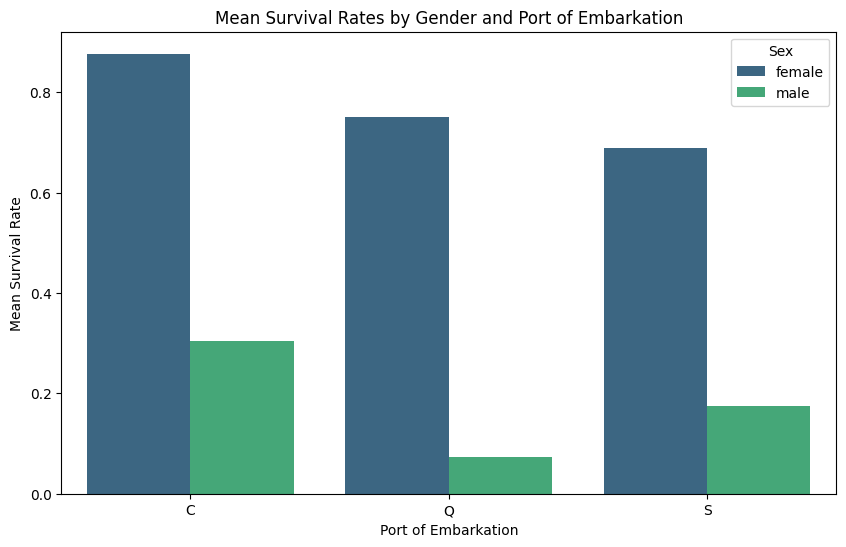

In [ ]:
#Problem 5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')

# Group by 'Sex' and 'Embarked' and calculate the mean of 'Survived' for each group
mean_survival_by_gender_port = df.groupby(['Sex', 'Embarked'])['Survived'].mean().reset_index()

# Create a bar plot to visualize the survival rates by gender and port of embarkation
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=mean_survival_by_gender_port, palette='viridis')

# Set the title and labels
plt.title('Mean Survival Rates by Gender and Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')

# Show the plot
plt.show()

In [1]:
import pandas as pd

In [2]:
data={
    'Name':['Alice','Bob','Charlie','David'],
    'Age':[24,19,22,25],
    'Score':[88,92,85,95]
}
df=pd.DataFrame(data)
print(df)

      Name  Age  Score
0    Alice   24     88
1      Bob   19     92
2  Charlie   22     85
3    David   25     95


In [3]:
df_soted_by_age=df.sort_values(by='Age')
print(df_soted_by_age.head())

      Name  Age  Score
1      Bob   19     92
2  Charlie   22     85
0    Alice   24     88
3    David   25     95


In [4]:
sorted_by_index=df.sort_index()
print(sorted_by_index.head())

      Name  Age  Score
0    Alice   24     88
1      Bob   19     92
2  Charlie   22     85
3    David   25     95


In [5]:
subset_iloc=df.iloc[1:3,0:2] # slicing row and column
print("subset iloc:")
print(subset_iloc)

subset iloc:
      Name  Age
1      Bob   19
2  Charlie   22


In [6]:
first_two_rows=df.iloc[1:2]
print("\nfirst two rows\n",first_two_rows)


first two rows
   Name  Age  Score
1  Bob   19     92


In [7]:
subset_loc=df.loc[df['Age']>20,['Name','Score']]
print("\nSubset using loc:")
print(subset_loc)


Subset using loc:
      Name  Score
0    Alice     88
2  Charlie     85
3    David     95


In [8]:
name_column=df[['Name','Age']]
print(name_column)

      Name  Age
0    Alice   24
1      Bob   19
2  Charlie   22
3    David   25


In [9]:
data={
    'Name':['Alice','Bob','Charlie','David'],
    'Department':['HR','IT','Finance','HR'],
    'Salary':[50000,60000,55000,62000]

}
df=pd.DataFrame(data)
print(df)

      Name Department  Salary
0    Alice         HR   50000
1      Bob         IT   60000
2  Charlie    Finance   55000
3    David         HR   62000


In [10]:
filtered_single=df[df['Department']=='HR']
print("\n filtered single column:",filtered_single)


 filtered single column:     Name Department  Salary
0  Alice         HR   50000
3  David         HR   62000


In [11]:
filtered_multiple=df.loc[df['Department'].isin(['HR','IT'])]
print("\n filtered multiple column:",filtered_multiple)


 filtered multiple column:     Name Department  Salary
0  Alice         HR   50000
1    Bob         IT   60000
3  David         HR   62000


In [12]:
data={
    'Category':['A','B','A','B','A'],
    'Value':[10,20,30,40,50]
}
df=pd.DataFrame(data)
grouped=df.groupby('Category')['Value'].mean()
print(grouped)

Category
A    30.0
B    30.0
Name: Value, dtype: float64


In [13]:
df['Normalized']=df.groupby('Category')['Value'].transform(lambda x:x/x.sum())
print(df)
# 10/ sabai ko sum ,20/sabai ko sum llikewise

  Category  Value  Normalized
0        A     10    0.111111
1        B     20    0.333333
2        A     30    0.333333
3        B     40    0.666667
4        A     50    0.555556


In [14]:
filtered=df.groupby('Category').filter(lambda x:x['Value'].sum()>60)
print(filtered)

  Category  Value  Normalized
0        A     10    0.111111
2        A     30    0.333333
4        A     50    0.555556


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

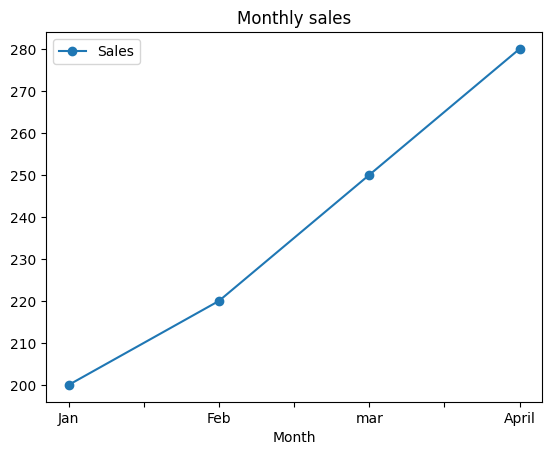

In [16]:
data={'Month':['Jan','Feb','mar','April'],
      'Sales':[200,220,250,280]

      }
df=pd.DataFrame(data)
df.plot(x='Month',y='Sales',kind='line',marker='o',title='Monthly sales')
plt.show()

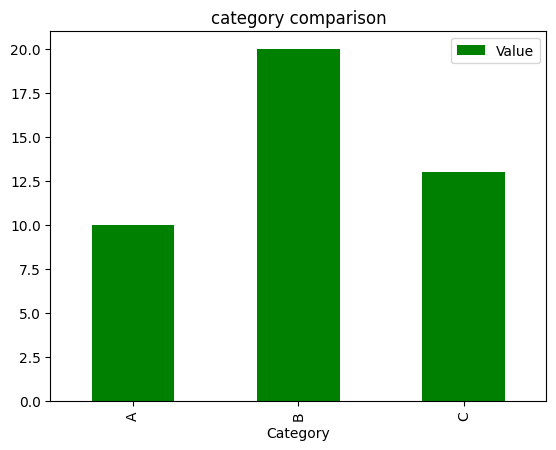

In [17]:
data={'Category':['A','B','C'],
      'Value':[10,20,13]

      }
df=pd.DataFrame(data)
df.plot(x='Category',y='Value',kind='bar',title='category comparison',color='green')
plt.show()

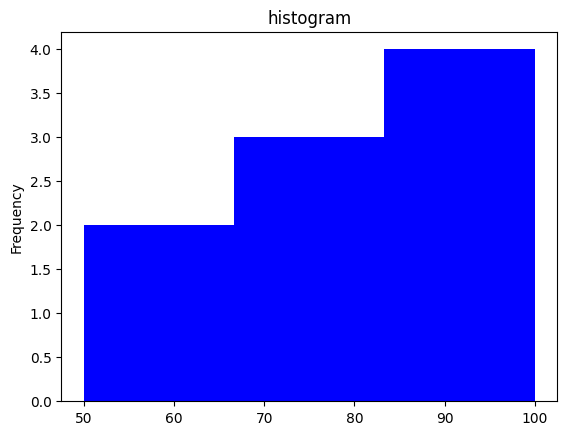

In [18]:
data={
    'Score':[50,60,70,75,80,85,90,95,100]

}
df=pd.DataFrame(data)
df['Score'].plot(kind='hist',bins=3,title='histogram',color='blue')
plt.show()

1. Load the provided dataset and import in pandas DataFrame.

In [19]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data/Titanic-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
fare=df['Fare']
print(fare.head())

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64


2. Create a DataFrame called class age that contains only the Pclass and Age columns of the Titanic dataset, in that order. Print the head of the result.

In [21]:
survived_gender=df[['Survived','Sex']]
print(survived_gender.head())

   Survived     Sex
0         0    male
1         1  female
2         1  female
3         1  female
4         0    male


2.1. Filter the Titanic dataset for cases where the passenger’s fare is greater than 100, assigning it to fare gt 100.View the printed result.

In [22]:
passanger_Fare_gt=df[df['Fare']>100]
print(passanger_Fare_gt)


     PassengerId  Survived  Pclass  \
27            28         0       1   
31            32         1       1   
88            89         1       1   
118          119         0       1   
195          196         1       1   
215          216         1       1   
258          259         1       1   
268          269         1       1   
269          270         1       1   
297          298         0       1   
299          300         1       1   
305          306         1       1   
306          307         1       1   
307          308         1       1   
311          312         1       1   
318          319         1       1   
319          320         1       1   
325          326         1       1   
332          333         0       1   
334          335         1       1   
337          338         1       1   
341          342         1       1   
373          374         0       1   
377          378         0       1   
380          381         1       1   
390         

 2. Filter the Titanic dataset for cases where the passenger’s class (Pclass) is 1, assigning it to
first class.View the printed result.

In [23]:
filtered_Pclass=df[df['Pclass']==1]
print(filtered_Pclass)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ... 

2.3. Filter the Titanic dataset for cases where the passenger’s age is less than 18 and the passenger is female (Sex is "female"), assigning it to female under 18. View the printed result.

In [24]:
passangerAge=df[(df['Age']<18) & (df['Sex']=='female')]
print(passangerAge.head())

    PassengerId  Survived  Pclass                                  Name  \
9            10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10           11         1       3       Sandstrom, Miss. Marguerite Rut   
14           15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
22           23         1       3           McGowan, Miss. Anna "Annie"   
24           25         0       3         Palsson, Miss. Torborg Danira   

       Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
9   female  14.0      1      0   237736  30.0708   NaN        C  
10  female   4.0      1      1  PP 9549  16.7000    G6        S  
14  female  14.0      0      0   350406   7.8542   NaN        S  
22  female  15.0      0      0   330923   8.0292   NaN        Q  
24  female   8.0      3      1   349909  21.0750   NaN        S  


1. Filter the Titanic dataset for passengers whose Embarked port is either "C" (Cherbourg) or "S" (Southampton), assigning the result to embarked c or s. View the printed result.

In [25]:
embarked_c_or_s=df[(df['Embarked']=='C') | (df['Embarked']=='S')]
print(embarked_c_or_s.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


2. Filter the Titanic dataset for passengers whose Pclass is in the list [1, 2] (indicating first or second class), assigning the result to first second class.View the printed result.

In [26]:
filtered_Pclass=df[(df['Pclass'].isin([1,2]))]
print(filtered_Pclass)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
9             10         1       2   
11            12         1       1   
..           ...       ...     ...   
880          881         1       2   
883          884         0       2   
886          887         0       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

1. Add a column to the Titanic dataset, fare per year, containing the fare divided by the age of the passenger(i.e., Fare/Age).

In [27]:
df['Fare_per_year']=df['Fare']/df['Age']
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Fare_per_year  
0      0         A/5 21171   7.2500   NaN        S       0.329545  
1      0          PC 17599  71.2833   C85        C       1.875876  
2      0  STON/O2. 3101282   7.9250   NaN        S       0.304808  
3      0            113803  53.1000  C123       

2. Subset rows where fare per year is higher than 5, assigning this to high fare age.

In [28]:
high=df[df['Fare_per_year']>5]
print(high)

     PassengerId  Survived  Pclass                                      Name  \
7              8         0       3            Palsson, Master. Gosta Leonard   
16            17         0       3                      Rice, Master. Eugene   
27            28         0       1            Fortune, Mr. Charles Alexander   
43            44         1       2  Laroche, Miss. Simonne Marie Anne Andree   
50            51         0       3                Panula, Master. Juha Niilo   
..           ...       ...     ...                                       ...   
813          814         0       3        Andersson, Miss. Ebba Iris Alfrida   
824          825         0       3              Panula, Master. Urho Abraham   
827          828         1       2                     Mallet, Master. Andre   
831          832         1       2           Richards, Master. George Sibley   
850          851         0       3   Andersson, Master. Sigvard Harald Elias   

        Sex    Age  SibSp  Parch       

3. Sort high fare age by descending fare per year, assigning this to high fare age srt.

In [29]:
high_fare_age_srt=df.sort_values(by='Fare_per_year',ascending=False)
print(high_fare_age_srt.head())

     PassengerId  Survived  Pclass                             Name     Sex  \
305          306         1       1   Allison, Master. Hudson Trevor    male   
297          298         0       1     Allison, Miss. Helen Loraine  female   
386          387         0       3  Goodwin, Master. Sidney Leonard    male   
164          165         0       3     Panula, Master. Eino Viljami    male   
183          184         1       2        Becker, Master. Richard F    male   

      Age  SibSp  Parch   Ticket      Fare    Cabin Embarked  Fare_per_year  
305  0.92      1      2   113781  151.5500  C22 C26        S     164.728261  
297  2.00      1      2   113781  151.5500  C22 C26        S      75.775000  
386  1.00      5      2  CA 2144   46.9000      NaN        S      46.900000  
164  1.00      4      1  3101295   39.6875      NaN        S      39.687500  
183  1.00      2      1   230136   39.0000       F4        S      39.000000  


4. Select only the Name and fare per year columns of high fare age srt and save the result as result.

In [30]:
result=high_fare_age_srt[['Fare_per_year','Name']]
print(result)

     Fare_per_year                                      Name
305     164.728261            Allison, Master. Hudson Trevor
297      75.775000              Allison, Miss. Helen Loraine
386      46.900000           Goodwin, Master. Sidney Leonard
164      39.687500              Panula, Master. Eino Viljami
183      39.000000                 Becker, Master. Richard F
..             ...                                       ...
859            NaN                          Razi, Mr. Raihed
863            NaN         Sage, Miss. Dorothy Edith "Dolly"
868            NaN               van Melkebeke, Mr. Philemon
878            NaN                        Laleff, Mr. Kristo
888            NaN  Johnston, Miss. Catherine Helen "Carrie"

[891 rows x 2 columns]


1. Calculate the total Fare paid across all passengers in the Titanic dataset.

In [31]:
total=df['Fare'].sum()
print("Total Fare:",total)

Total Fare: 28693.9493


2. Subset for passengers in first class (Pclass is 1) and calculate their total fare.

In [32]:
firstClass=df[df['Pclass']==1]['Fare']
totalf=firstClass.sum()
print(totalf)

18177.4125


3. Do the same for second class (Pclass is 2) and third class (Pclass is 3).

In [33]:
secondClass=df[df['Pclass']==2]['Fare']
totalS=secondClass.sum()
print("Total of second class:",totalS)
thirdClass=df[df['Pclass']==3]['Fare']
totalT=thirdClass.sum()
print("Total of third class:",totalT)

Total of second class: 3801.8417
Total of third class: 6714.6951


4. Combine the fare totals from first, second, and third classes into a list.

In [34]:
lst=[total,totalS,totalT]
print(lst)

[28693.9493, 3801.8417, 6714.6951]


5. Divide the totals for each class by the overall total fare to get the proportion of fare revenue by class.

In [35]:
proptionfirst=totalf/total
proptionsecond=totalS/total
proptionthird=totalT/total
print("First:",proptionfirst)
print("Second:",proptionsecond)
print("Third:",proptionthird)

First: 0.6334928771899656
Second: 0.1324962855496507
Third: 0.23401083726038366


1. Create a new column, age group, that categorizes passengers into "child" (age < 18), "adult" (age 18{64), and "senior" (age 65 and above).

In [36]:
df['ageGroup']=df['Age'].apply(lambda Age:'child' if Age<18 else 'adult' if 18<= Age<=65 else 'senior' if Age>65 else 'invalid')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Fare_per_year ageGroup  
0      0         A/5 21171   7.2500   NaN        S       0.329545    adult  
1      0          PC 17599  71.2833   C85        C       1.875876    adult  
2      0  STON/O2. 3101282   7.9250   NaN        S       0.304808    adult  
3      0    

2. Calculate the total number of passengers on the Titanic.

In [37]:
total_passenger=len(df)
print(total_passenger)

891


3. Count the number of passengers in each age group.

In [38]:
numberChild=len(df[df['ageGroup']=='child'])
numberAdult=len(df[df['ageGroup']=='adult'])
numberSenior=len(df[df['ageGroup']=='senior'])
print("Number of children:",numberChild)
print("Number of adult:",numberAdult)
print("Number of senior:",numberSenior)

Number of children: 113
Number of adult: 593
Number of senior: 8


4. Divide the count of each age group by the total number of passengers to get the proportion of passengers in each age group.

In [39]:
countChildprop= numberChild/total_passenger
countAdultprop=numberAdult/total_passenger
countSeniorprop=numberSenior/total_passenger
print("Proportion of children:",countChildprop)
print("Proportion of adult:",countAdultprop)
print("Proportion of senior:",countSeniorprop)

Proportion of children: 0.12682379349046016
Proportion of adult: 0.6655443322109988
Proportion of senior: 0.008978675645342313


5. Display the proportion as a percentage.

In [40]:
print("Proportion of children:",countChildprop,"%")
print("Proportion of adult:",countAdultprop,"%")
print("Proportion of senior:",countSeniorprop,"%")

Proportion of children: 0.12682379349046016 %
Proportion of adult: 0.6655443322109988 %
Proportion of senior: 0.008978675645342313 %
